In [18]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix
import pix2pix_128
import time
import cv2
import matplotlib.pyplot as plt

In [6]:
dataset, metadata = tfds.load('cycle_gan/horse2zebra', with_info=True, as_supervised=True)

train_horses, train_zebras = dataset['trainA'], dataset['trainB']
test_horses, test_zebras = dataset['testA'], dataset['testB']

In [7]:
CHANNELS = 3
BUFFER_SIZE = 1000
BATCH_SIZE = 12
IMG_WIDTH = 128
IMG_HEIGHT = 128

In [8]:

# 128x128 input version
generator_g = pix2pix_128.generator(norm_type='instancenorm')
generator_f = pix2pix_128.generator(norm_type='instancenorm')

discriminator_x = pix2pix_128.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix_128.discriminator(norm_type='instancenorm', target=False)

# 256x256 input version
# generator_g = pix2pix.unet_generator(CHANNELS, norm_type='instancenorm')
# generator_f = pix2pix.unet_generator(CHANNELS, norm_type='instancenorm')

# discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
# discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

In [9]:
from cyclegan import Cyclegan
from preprocess import Preprocess

In [10]:
cyclegan = Cyclegan(
    generator_g, 
    generator_f, 
    discriminator_x, 
    discriminator_y
)

In [11]:
preprocess = Preprocess(resolution = [IMG_WIDTH, IMG_HEIGHT])

train_horses, train_zebras, test_horses, test_zebras = preprocess.preprocess_all(
    train_horses, 
    train_zebras, 
    test_a = test_horses,
    test_b = test_zebras
)

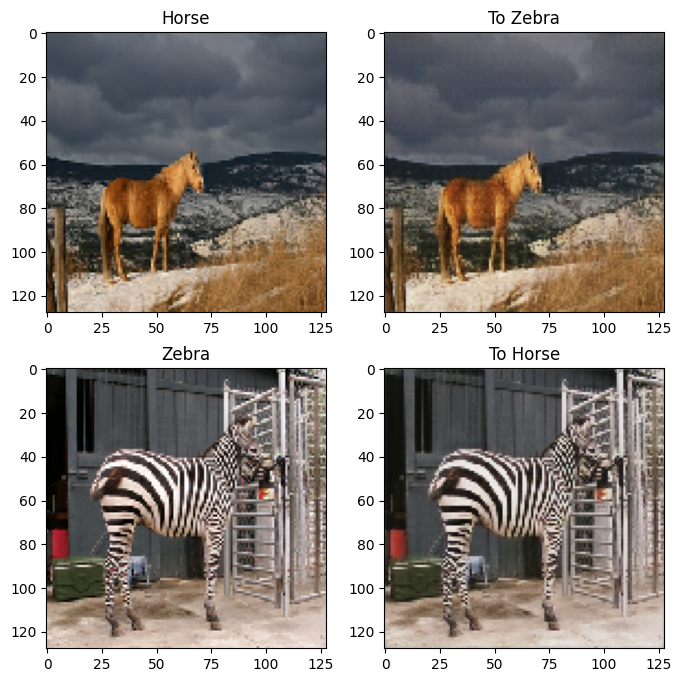

In [33]:
sample_horse = next(iter(train_horses))
sample_zebra = next(iter(train_zebras))

def show_result():
    to_zebra = generator_g(sample_horse)
    to_horse = generator_f(sample_zebra)
    plt.figure(figsize=(8, 8))
    contrast = 8

    imgs = [sample_horse, to_zebra, sample_zebra, to_horse]
    title = ['Horse', 'To Zebra', 'Zebra', 'To Horse']

    for i in range(len(imgs)):
        plt.subplot(2, 2, i+1)
        plt.title(title[i])
        if i % 2 == 0:
            plt.imshow(imgs[i][0] * 0.5 + 0.5)
        else:
            plt.imshow(imgs[i][0] * 0.5 + 0.5)
    plt.show()
    
show_result()

In [23]:
cyclegan.train_n_epochs(train_horses, train_zebras, 1)

Start training for 1 epochs


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [04:05<00:00, 245.79s/it]


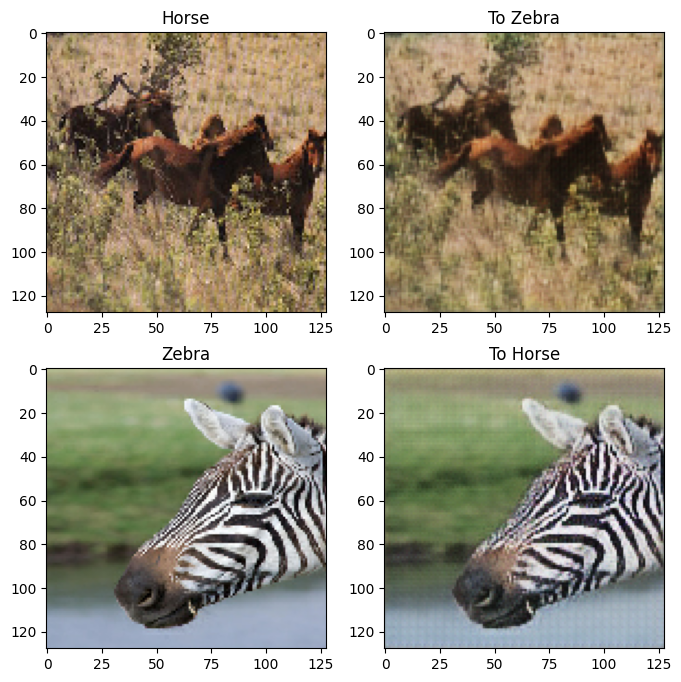

In [24]:
show_result()

In [25]:
cyclegan.train_n_epochs(train_horses, train_zebras, 2)

Start training for 2 epochs


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [08:23<00:00, 251.56s/it]


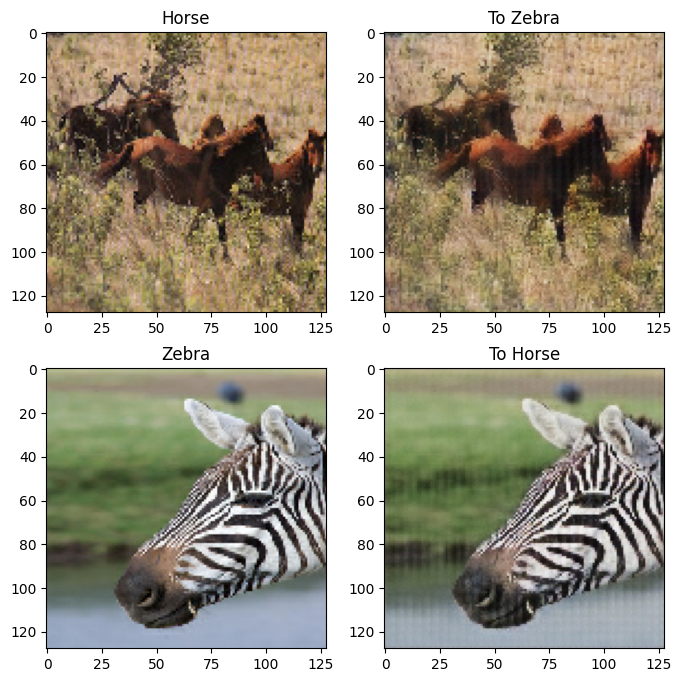

In [26]:
show_result()

In [27]:
cyclegan.train_n_epochs(train_horses, train_zebras, 4)

Start training for 4 epochs


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [15:33<00:00, 233.32s/it]


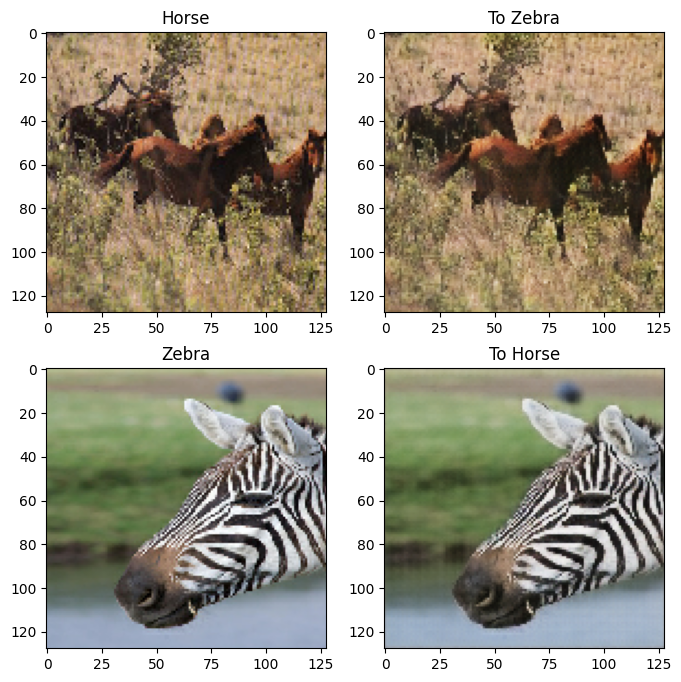

In [28]:
show_result()